In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [14]:
pcos_df=pd.read_csv("pcos_dataset.csv")
pcos_df

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
...,...,...,...,...,...,...
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0


In [22]:
pcos_df.isnull().sum()#check for null values

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [24]:
pcos_df.describe()#descriptive statistics

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [28]:
pcos_df.corr()#checking for correlation between the variables

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
Age,1.000000,-0.049455,0.032300,-0.050129,0.017841,-0.064675
BMI,-0.049455,1.000000,0.031189,0.003811,0.030724,0.377852
Menstrual_Irregularity,0.032300,0.031189,1.000000,0.042694,0.035851,0.469376
Testosterone_Level(ng/dL),-0.050129,0.003811,0.042694,1.000000,0.011976,0.200817
Antral_Follicle_Count,0.017841,0.030724,0.035851,0.011976,1.000000,0.192014
PCOS_Diagnosis,-0.064675,0.377852,0.469376,0.200817,0.192014,1.000000


In [32]:
pcos_df['PCOS_Diagnosis'].value_counts()#check balance

PCOS_Diagnosis
0    801
1    199
Name: count, dtype: int64

In [42]:
#split dataset into features and labels
X=pcos_df.drop(columns=['Age','PCOS_Diagnosis'],axis=1)
y=pcos_df['PCOS_Diagnosis']

In [44]:
print(X)

      BMI  Menstrual_Irregularity  Testosterone_Level(ng/dL)  \
0    34.7                       1                       25.2   
1    26.4                       0                       57.1   
2    23.6                       0                       92.7   
3    28.8                       0                       63.1   
4    22.1                       1                       59.8   
..    ...                     ...                        ...   
995  18.4                       1                       95.7   
996  28.9                       1                       28.5   
997  28.3                       0                       32.4   
998  27.3                       0                       95.6   
999  21.9                       1                       78.9   

     Antral_Follicle_Count  
0                       20  
1                       25  
2                       28  
3                       26  
4                        8  
..                     ...  
995                     23  

In [46]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: PCOS_Diagnosis, Length: 1000, dtype: int64


In [326]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)#split data

In [328]:
#standardize features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [330]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [332]:
#create and train the model
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [334]:
#make predictions
y_pred=model.predict(X_test_scaled)


In [336]:
#evaluate the model
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9


In [338]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       247
           1       0.73      0.70      0.71        53

    accuracy                           0.90       300
   macro avg       0.83      0.82      0.83       300
weighted avg       0.90      0.90      0.90       300



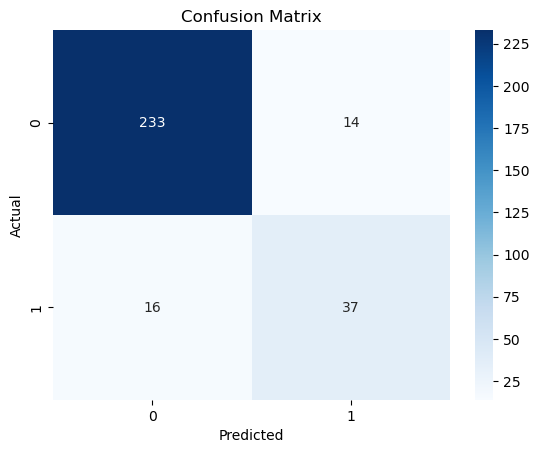

In [340]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [344]:
import numpy as np
print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_resampled))


Before SMOTE: [554 146]
After SMOTE : [554 554]


In [346]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)


In [348]:
model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [350]:
y_pred=model.predict(X_test_scaled)

In [352]:
#evaluate the model
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9966666666666667


In [354]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      0.98      0.99        53

    accuracy                           1.00       300
   macro avg       1.00      0.99      0.99       300
weighted avg       1.00      1.00      1.00       300



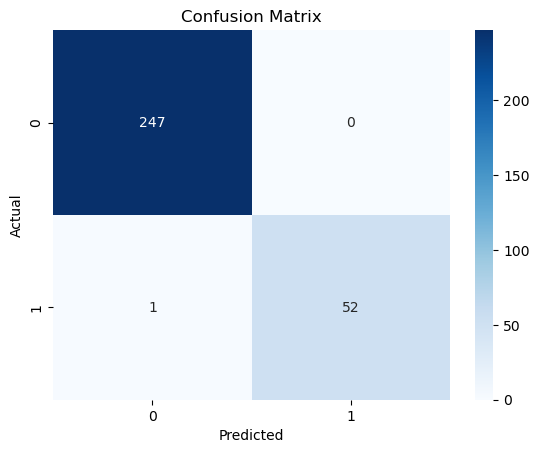

In [356]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [370]:
new_data=np.array([[27.4,1,90.0,21],
                   [24.5,0,50.4,20],
                   [26.8,1,80.6,26],
                   [27.7,0,50.8,23]])

In [438]:
new_data = pd.DataFrame({
    'BMI': [27.4,24.5,26.8,27.7],
    'Menstrual_Irregularity': [1,0,1,0],
    'Testosterone_Level(ng/dL)': [90.0,50.4,80.6,60.6],
    'Antral_Follicle_Count': [21,20,26,23]
})

In [440]:
new_data

,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count
0,27.4,1,90.0,21
1,24.5,0,50.4,20
2,26.8,1,80.6,26
3,27.7,0,60.6,23


In [442]:
new_data_scaled=scaler.transform(new_data)


In [444]:
predictions=model.predict(new_data_scaled)
print("Predictions:",predictions)

Predictions: [1 0 1 0]


In [446]:
#As we can see the prediction outcome depends on the menstrual irregularities this means that pcos_diagnosis is highly correlated with menstrual irreguralities as we we wvwn saw earlier

In [448]:
# Lets see how predictions differ by Menstrual_Irregularity
new_data['Prediction'] = predictions
new_data.groupby('Menstrual_Irregularity')['Prediction'].value_counts(normalize=True)


Menstrual_Irregularity  Prediction
0                       0             1.0
1                       1             1.0
Name: proportion, dtype: float64

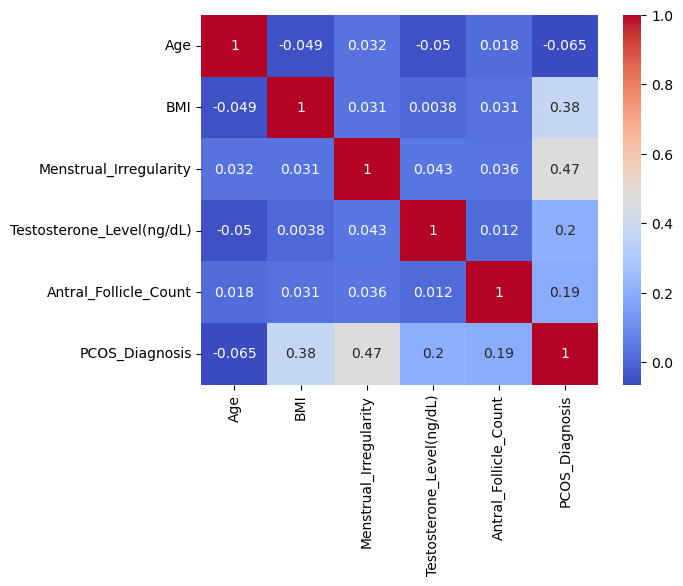

In [450]:

sns.heatmap(pcos_df.corr(), annot=True, cmap='coolwarm')
plt.show()


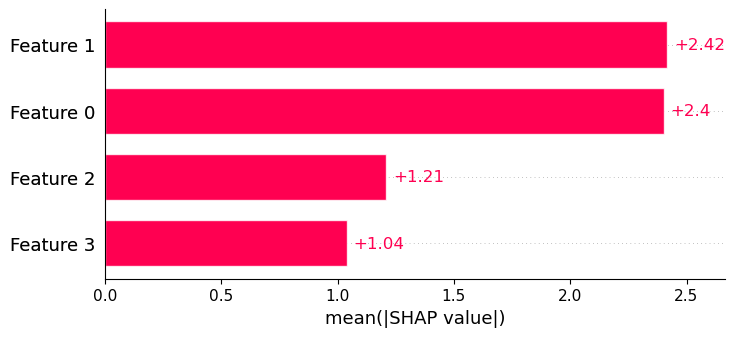

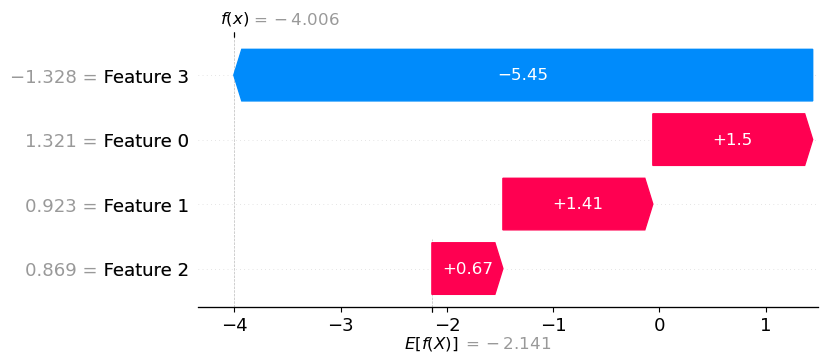

In [451]:
#checking for feature importance

import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

shap.plots.bar(shap_values)  # Global importance
shap.plots.waterfall(shap_values[0])  # One prediction


In [453]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10)
importances = result.importances_mean

In [456]:
importances

array([0.15366667, 0.16166667, 0.09933333, 0.077     ])